### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

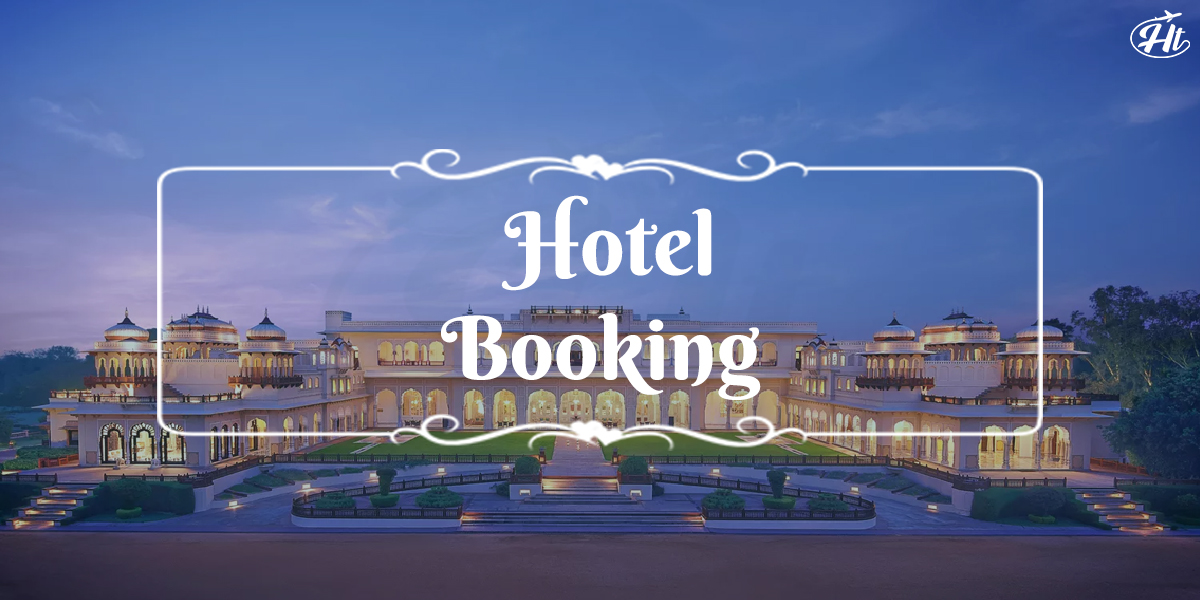

## **Loading the data**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import plotly.express as px

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive//MyDrive/ALMABETTER/Capstone_project_1/Hotel_Bookings.csv')


# **Understanding the data**

In [7]:
# Printing all the columns
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [8]:
df.shape

(119390, 32)

In [9]:
# Finding the information regarding the null values and datatypes of all the columns in our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# Finding the count of null values in all the columns of our dataset.
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

### Here we have  a lot of Null values in columns 'company' and 'agent' which highly impact our further analysis of data so we will remove these two columns for our further analysis.

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **Cleaning the Data**

> by dropping values which don't seem relevant for our study.

*  arrival_date_week_number, arrival_date_day_of_month,company, previous_cancellations, previous_bookings_not_canceled and agent

In [12]:
df.drop(['arrival_date_week_number','arrival_date_day_of_month','company','agent','previous_cancellations','previous_bookings_not_canceled','reservation_status_date'], axis=1, inplace=True)

In [13]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2
children,0.0,0.0,0.0,0.0,0.0
babies,0,0,0,0,0


In [14]:
# Finding the count of null values in remaining columns.
df.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
is_repeated_guest                0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status               0
dtype: int64

### To further clean the data if the numerical value in a column is null and if the count of the null is nominal we can upload it to the median value.
Here the null count of children is just 4 out of 1lakh plus records. hence we use filling the median value method

In [15]:
df['children'].median()

0.0

In [16]:
#Filling the null values with the median value.
df['children'].fillna(df['children'].median(), inplace=True)

In [17]:
df.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         0
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
is_repeated_guest                0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status               0
dtype: int64

### Further cleaning the data.Here the Null values of country is less than 0.5% so we can add the mode to null values

In [18]:
df['country'].mode()

0    PRT
dtype: object

In [19]:
df.loc[df['country'] == 'PRT', 'country'].count()

48590

In [20]:
df['country'].fillna(df['country'].mode()[0], inplace=True)


In [21]:
df.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
dtype: int64

**DATA IS NOW CLEAN!!!!!**


# **Histogram to show the distribution of data throughout the values**

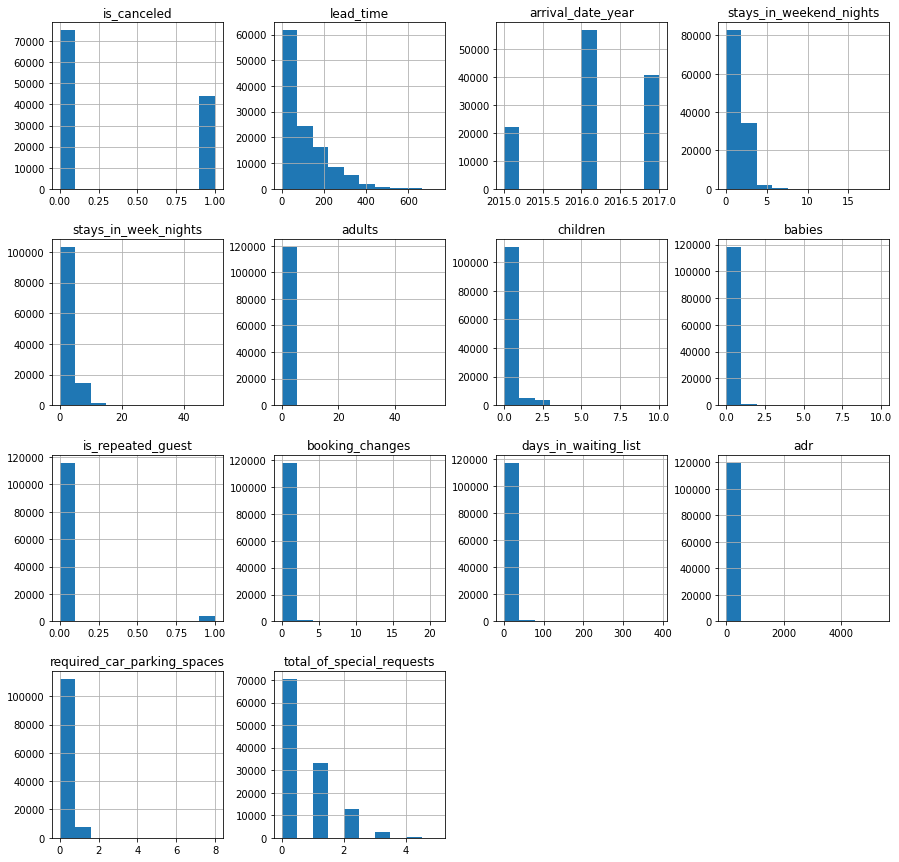

In [22]:
# Plotting a graph to show a histogram for all the columns in the dataset
df.hist(figsize=(15,15))
plt.show()

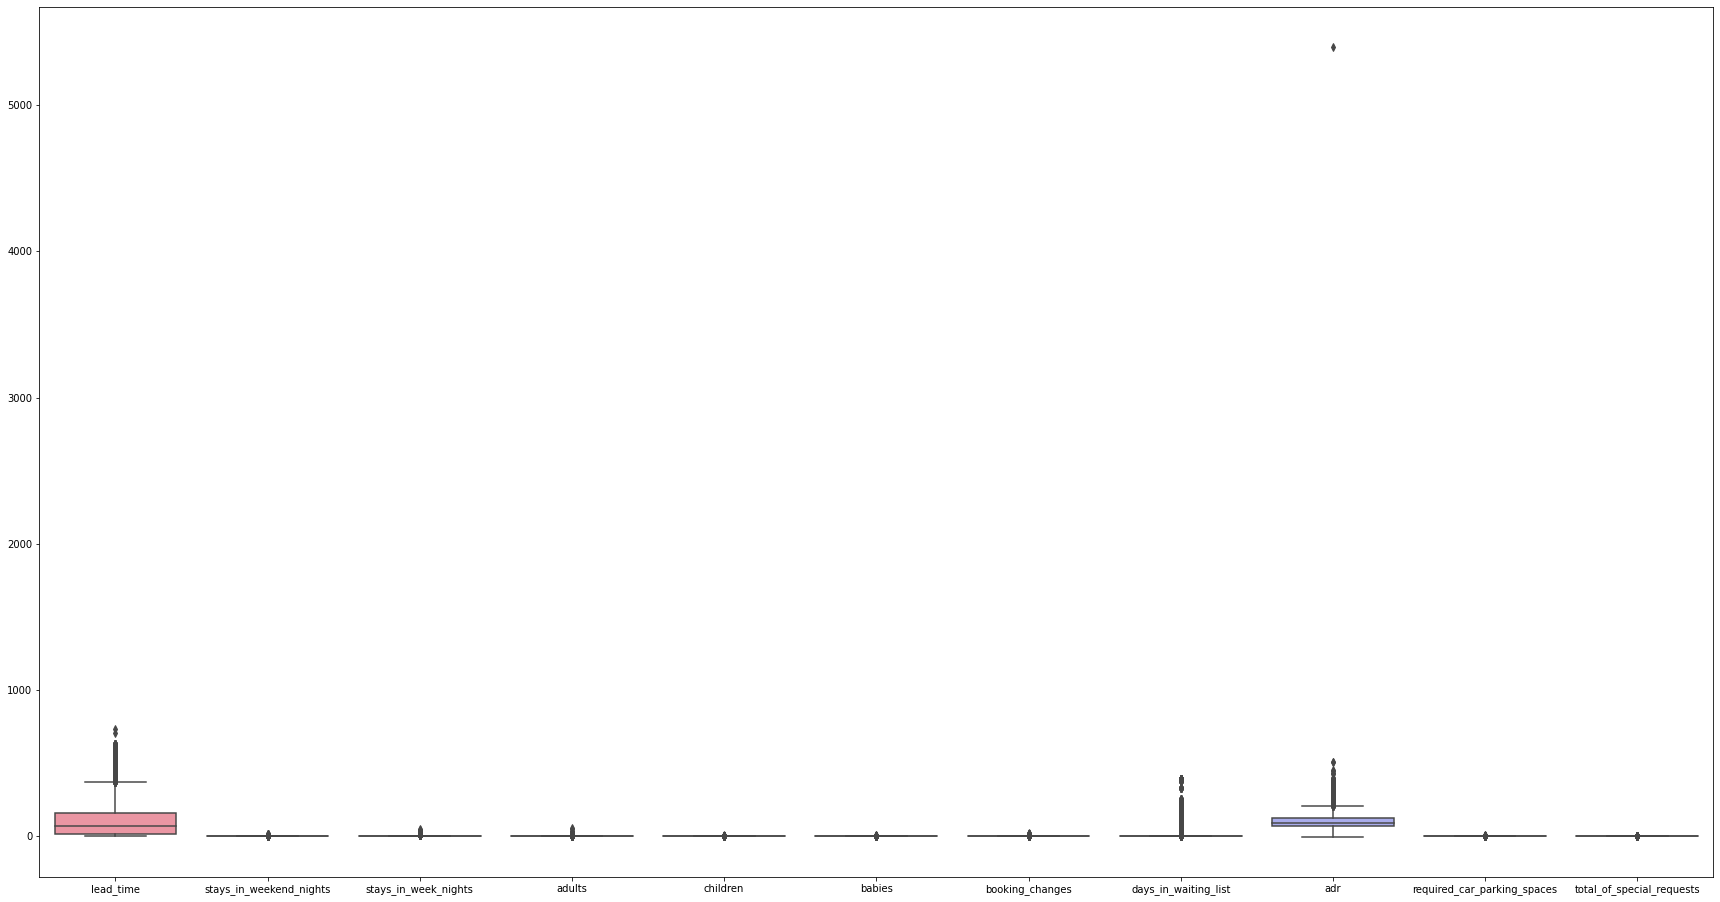

In [23]:
# Plotting a boxplot to find out the outliers in each column
plt.figure(figsize=(30,16))
sns.boxplot(data=df[['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']])
plt.show()

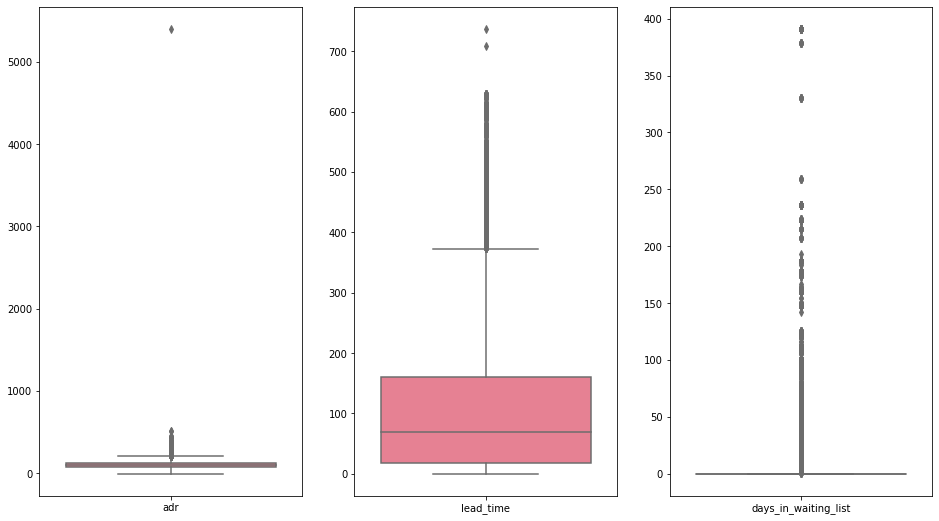

In [24]:
fig, axes=plt.subplots(1,3, figsize=(16,9))
sns.set_palette('husl')
ax= sns.boxplot(data=df[['adr']], ax=axes[0])
ax=sns.boxplot(data=df[['lead_time']], ax=axes[1])
ax= sns.boxplot(data=df[['days_in_waiting_list']], ax=axes[2])
plt.show()

### We can see that column 'adr' has a very high outlier and some outliers in other columns too i.e.  'lead time' & 'days in waiting list'.

#**Handling outliers**

In [25]:
# # First Removing outliers by defining threshold based on common understanding
new_df = df.copy()

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [26]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time','days_in_waiting_list']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [27]:
# Removing outliers in adr column
new_df.drop(new_df[new_df['adr'] > 5000].index, inplace = True)
new_df.drop(new_df[new_df['adr'] <= 0].index, inplace = True)

In [28]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room',
                      'arrival_date_year']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

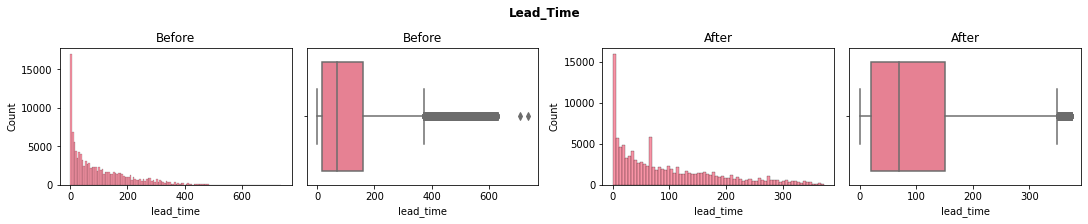

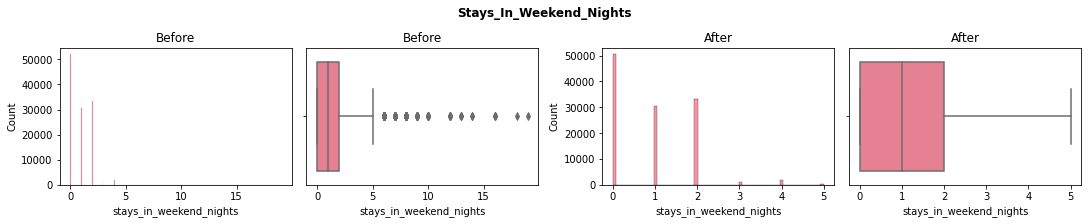

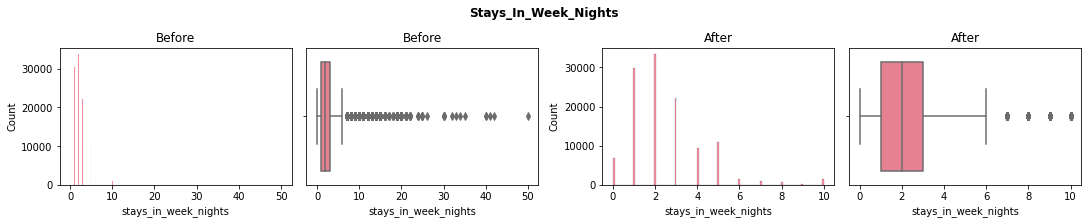

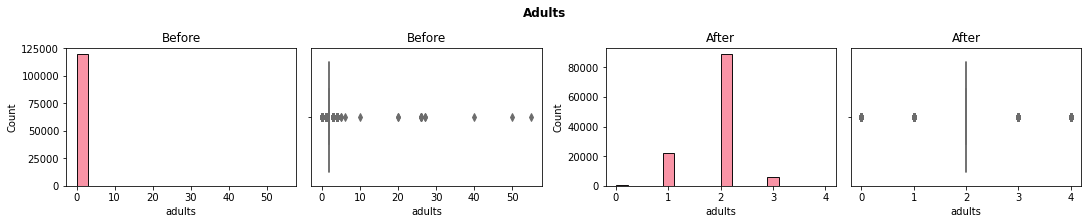

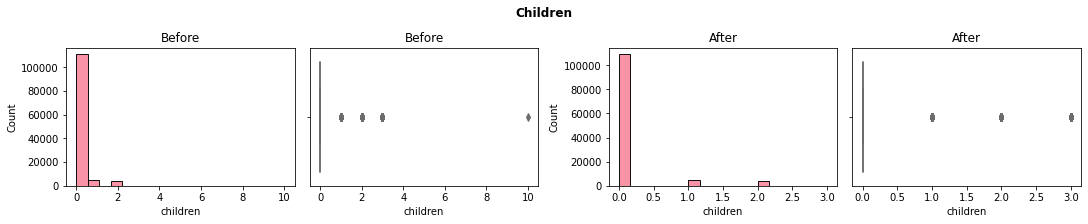

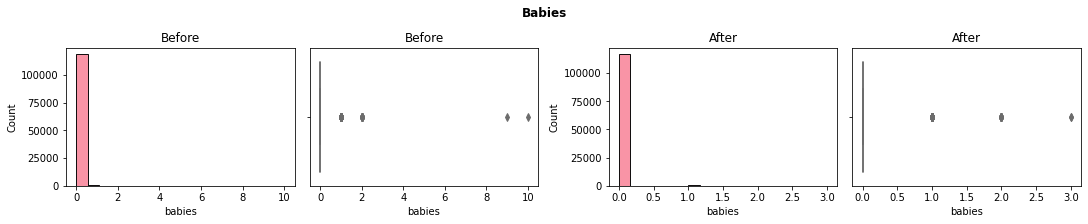

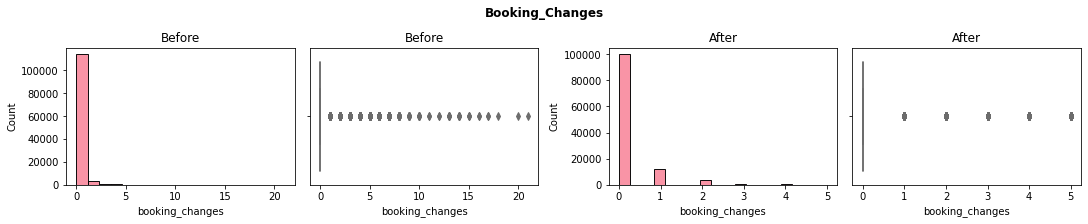

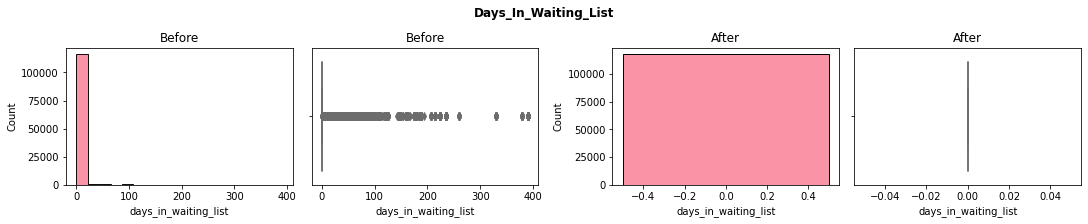

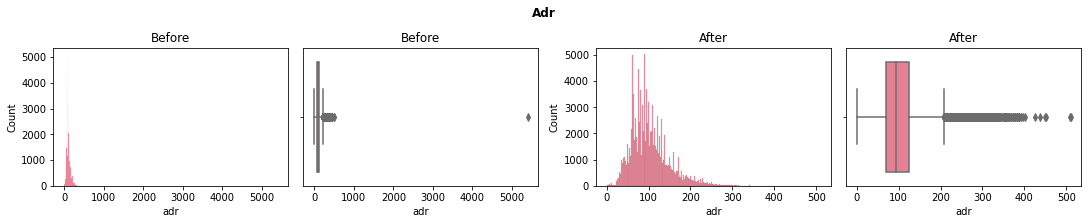

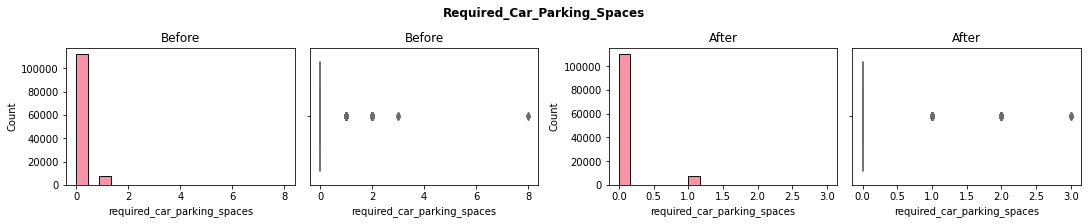

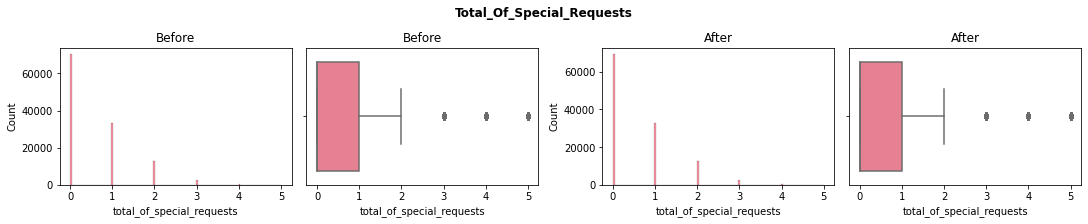

In [29]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")

# After treating outliers
  sns.histplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

### Now we will do Data manipulation to use our data for some other useful insigts

##**Data Manipulation**

In [30]:
# Making a new column 'kids' joining two columns i.e 'babies' and 'children'.
new_df['kids']=new_df['babies'] + new_df['children']

In [31]:
# Making a new column 'total stays' by adding two columns 'stays_in_week_nights' and 'stays_in_weekend_nights'.
new_df['total_stays']=new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']

In [32]:
# Making a new column actual guest based on no cancellation
actual_guests = new_df.loc[new_df["is_canceled"] == 0]
# Now creating a new column revenue by multiply adr with total stays
actual_guests['revenue'] = (actual_guests['adr'] * (actual_guests['total_stays']))/1000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
new_df['guest']= new_df['adults']+new_df['children']+new_df['babies']
new_df['guest'] = new_df.guest.map( lambda x: 'Single' if x == 1 else 'Family')
new_df['kids_count'] = new_df.kids.map( lambda x: 'no_kids' if x == 0 else 'kids')

Removing null values in the new columns that are not required for our study

In [34]:
# Removing adult count=0 as it is not relevent for our study
new_df.drop(new_df[new_df['adults'] == 0].index, inplace = True)
# Removing total stays=0 as it is not relevent for our study
new_df.drop(new_df[new_df['total_stays'] == 0].index, inplace = True)
# Removing assigned room type=0 as it is not relevent for our study
new_df.drop(new_df[new_df['assigned_room_type'] == 0].index, inplace = True)

#**Exploratory data analysis**

We have analysed our data based on these three different methods:-

1) UNIVARIATE ANALYSIS: 
Univariate analysis is the simplest form of analyzing data i.e study of one variable. Its major purpose is to describe; distribution of single data, and find patterns in the data.

2) BIVARIATE ANALYSIS:
Bivariate analysis between two variables. One of the variables will be dependent and the other is independent. The study is analyzed between the two variables to understand to what extent the change has occurred.

3) MULTIVARIATE ANALYSIS
Multivariate data analysis is the study of relationships among the attributes, classify the collected samples into homogeneous groups, and make inferences about the underlying populations from the sample.


#### We have our analysis of this data based on following parameters:-

*   Based on Reservations/booking
*   Based on Cancellation
*   Based on Stays
*   Based on ADR
*   Based on Revenue
*   Based on Meal Type
*   Based on Country
*   Based on Car Parking Spaces
*   Based on Repeated Guest
*   Based on Reservation Status
*   Based on Special Request


# **Analysis based on Reservations/Booking**

### **Reservations in different Hotel Type**

Text(0.5, 1.0, '% share of different hotel type ')

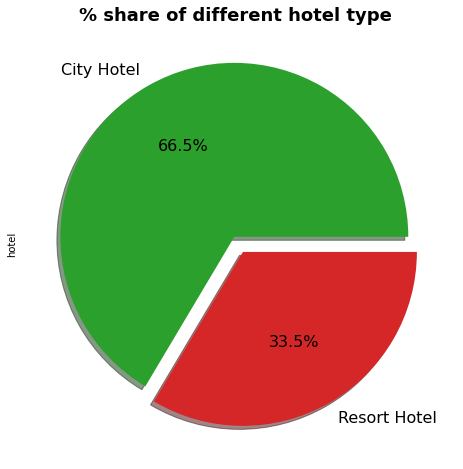

In [35]:
# Visualizing the bookings by pie chart.
ax = new_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=16, colors=['tab:green', 'tab:red'])   
ax.set_title('% share of different hotel type ',fontsize = 18, fontweight='bold')

### City Hotels are most preferred hotel by guests. Thus city hotels has maximum bookings.

## **Comparative analysis of reservations and revenue of hotels**

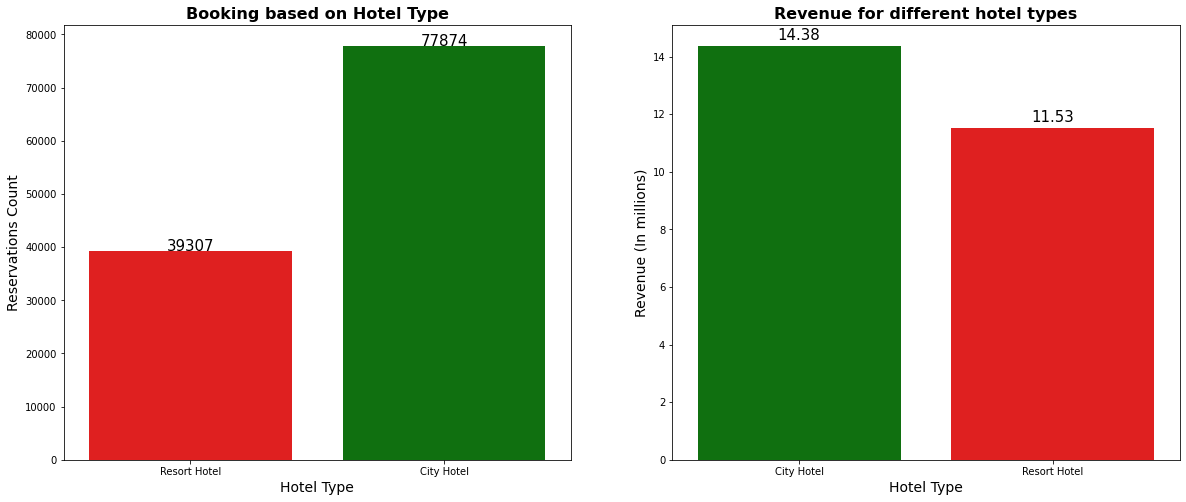

In [36]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(20, 8))

# This graph shows the reservations made in both type of hotels- 'Resort Hotel','City Hotel'.
ax = sns.countplot(ax=axes[0], data=new_df, x='hotel',palette=['red', 'green'])
ax.set_title('Booking based on Hotel Type',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Hotel Type', fontsize = 14)
ax.set_ylabel('Reservations Count', fontsize = 14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.40,rect.get_height(),horizontalalignment='center', fontsize = 15)

#This graph shows price distribution for hotel type
revenue_hotel=actual_guests.groupby('hotel')['revenue'].sum().reset_index().round(2)
ax = sns.barplot(ax=axes[1], x='hotel', y='revenue', data=revenue_hotel,palette=['green', 'red'])
ax.set_title('Revenue for different hotel types',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Revenue (In millions)',fontsize = 14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### City Hotels are most preferred hotel by guests. Since the bookings are double for City hotel but the revenue difference is not much in between them.This shows that Resort hotels are more expensive as compared to City hotels.


## **Comparative study of reservation based on lead time and booking of hotels in each month**

In [37]:
new_df_lead=new_df.groupby(['arrival_date_month','hotel'])['lead_time'].mean().astype(int).reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# It will take the order of the month list in the df along with values
new_df_lead['arrival_date_month']=pd.Categorical(new_df_lead['arrival_date_month'],categories=months,ordered=True)
new_df['arrival_date_month']=pd.Categorical(new_df['arrival_date_month'],categories=months,ordered=True)
#sorting
new_df_lead=new_df_lead.sort_values('arrival_date_month')

Text(0, 0.5, 'Booking count')

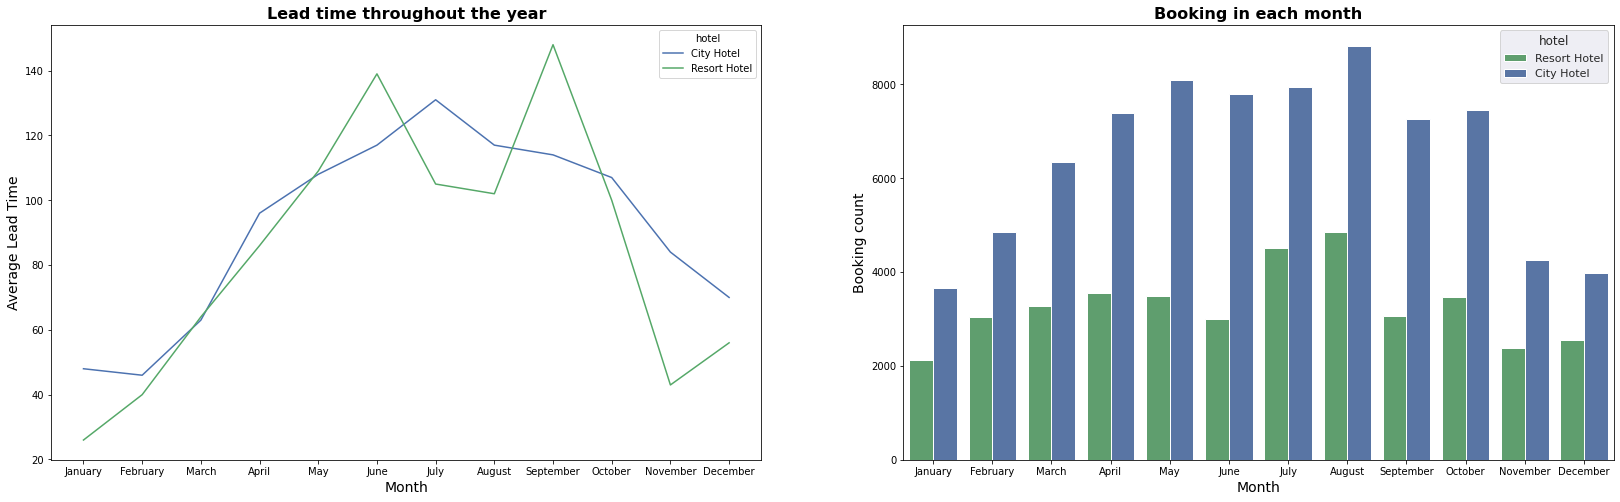

In [38]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(28, 8))

ax = sns.lineplot(ax=axes[0], data=new_df_lead, x=new_df_lead['arrival_date_month'], y=new_df_lead['lead_time'],hue=new_df_lead['hotel'],palette=['b','g'])
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title('Lead time throughout the year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Average Lead Time', fontsize = 14)

ax = sns.countplot(ax=axes[1], data=new_df, x=new_df['arrival_date_month'], hue=new_df['hotel'],palette=['g','b'])
sns.set(rc={'figure.figsize':(10,8)})
ax.set_title('Booking in each month',fontsize = 16, fontweight='bold')
ax.set_xlabel('Month',fontsize = 14)
ax.set_ylabel('Booking count',fontsize = 14)

### From the above graph we can see in city hotels there is a peak in lead time from April to July and the booking is high in August. And in resort hotels we can see two peaks in lead time, first in June and second in September and booking is high in July,August and October, so people usually book hotel 30-60 days in advance.


## **Reservations Made in each Year**

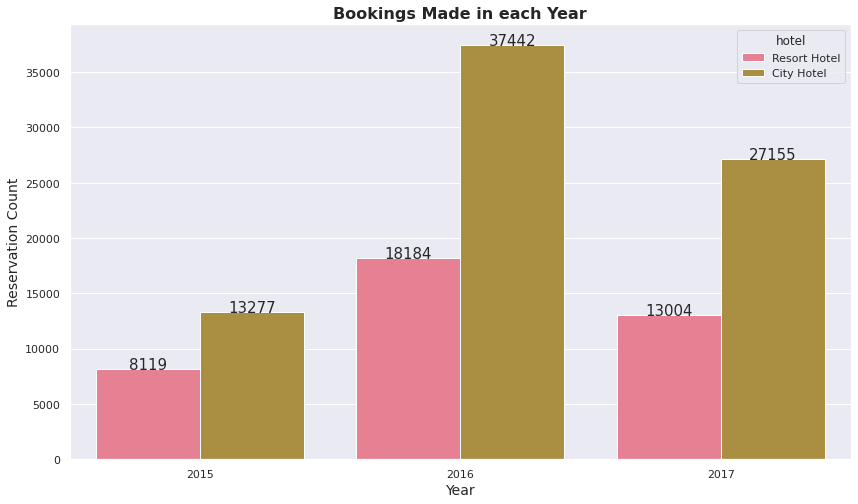

In [39]:
# This graph shows the booking made in each month for different hotel types.
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("husl")
ax = sns.countplot(x = 'arrival_date_year',hue='hotel', data=new_df)
ax.set_title('Bookings Made in each Year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Reservation Count',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### It seems that 2016 to be year where the hotel bookings are highest.

## **Bookings made by different Distribution channel**

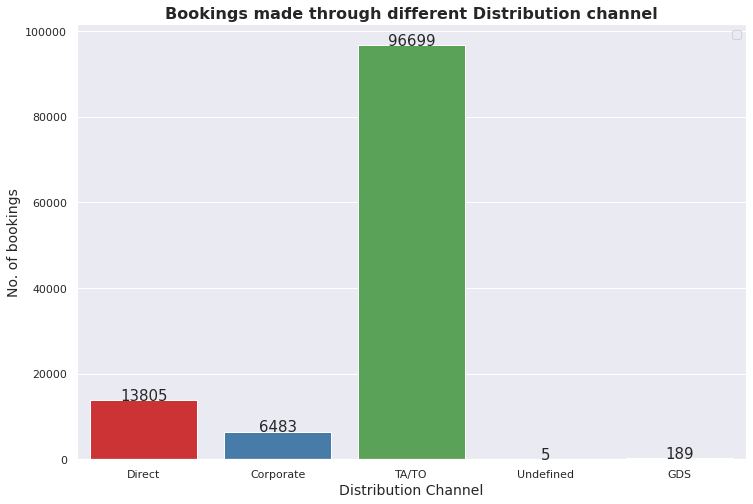

In [40]:
# This graph shows reservations made by different distribution channel.
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='distribution_channel', data=new_df)
ax.set_title('Bookings made through different Distribution channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Distribution Channel',fontsize = 14)
ax.set_ylabel('No. of bookings',fontsize = 14)
plt.legend(loc='upper right')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### Majority of the bookings are done by Travel agencies(Online/Offline) and Tour Operators for both hotel types.

##**Market share of different customer type**

Text(0.5, 1.0, 'Percentage share of customer type')

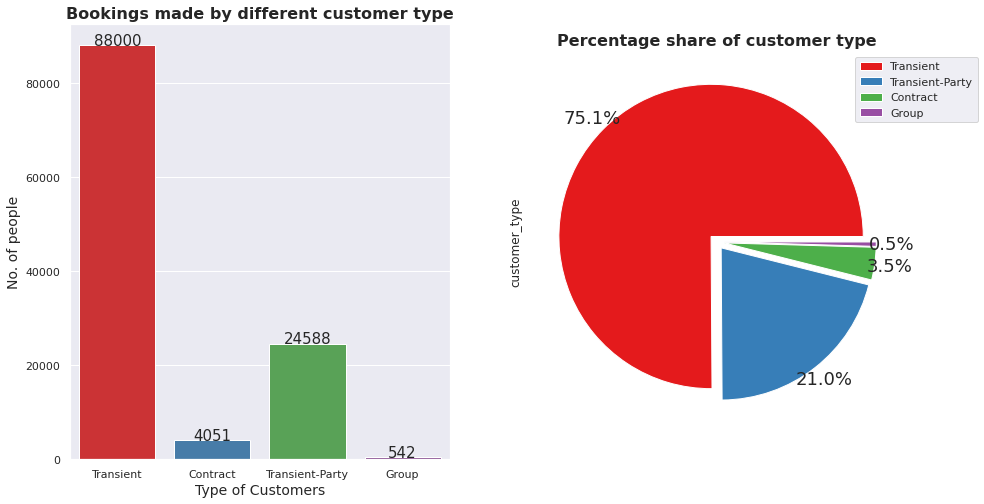

In [41]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
ax = sns.countplot(ax=axes[0],x='customer_type', data=new_df)
ax.set_title('Bookings made by different customer type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Type of Customers',fontsize = 14)
ax.set_ylabel('No. of people',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

ax=axes[1],new_df['customer_type'].value_counts().plot.pie(explode=[0.05]*4, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,labeldistance=1.3,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['customer_type'].value_counts().index.tolist())
plt.title('Percentage share of customer type',fontsize = 16, fontweight='bold')


### 75% of bookings are done by Transient customer type.

## **Preferred Room type**

In [44]:
room_price=new_df.groupby('reserved_room_type')['adr'].mean().astype(int).reset_index().sort_values(by='adr',ascending=True)
hotel_room = new_df.groupby('reserved_room_type')['hotel'].count().astype(int).reset_index().sort_values(by='hotel',ascending=False)

Text(0, 0.5, 'ADR')

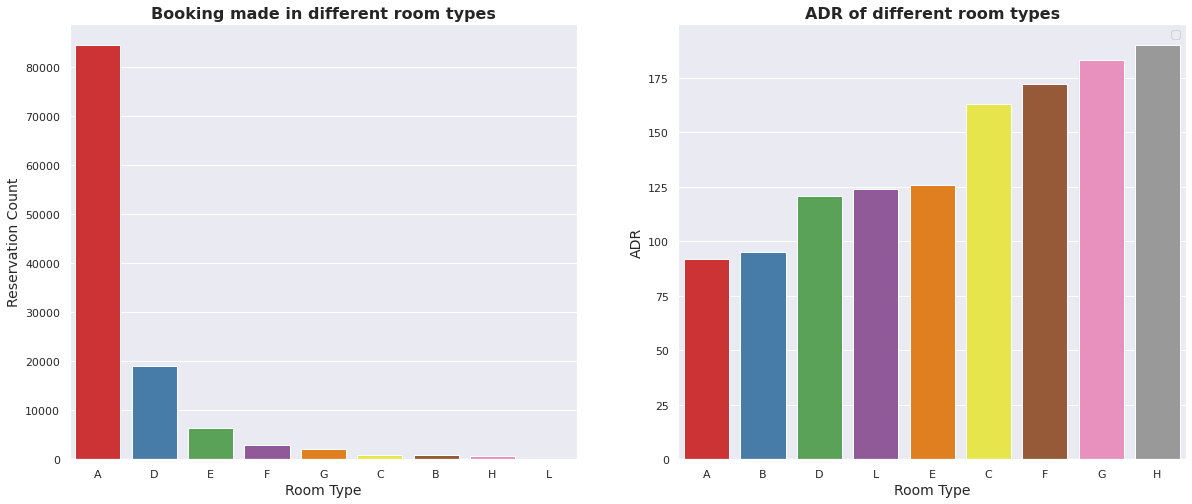

In [45]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(20, 8))

# The graph shows reservation made on different room types
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.barplot(ax=axes[0],x='reserved_room_type',y='hotel',data=hotel_room)
graph.set_title('Booking made in different room types',fontsize = 16, fontweight='bold')
graph.set_xlabel('Room Type',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.barplot(ax=axes[1],x='reserved_room_type', y='adr',data=room_price)
graph.set_title('ADR of different room types',fontsize = 16, fontweight='bold')
graph.set_xlabel('Room Type',fontsize = 14)
graph.set_ylabel('ADR',fontsize = 14)


### Majority of people prefers room type-A which seems to be more economical for booking as it has the least ADR. And ADR is higher with room type-H so lesser booking are made. 


## **Bookings based on deposit type**

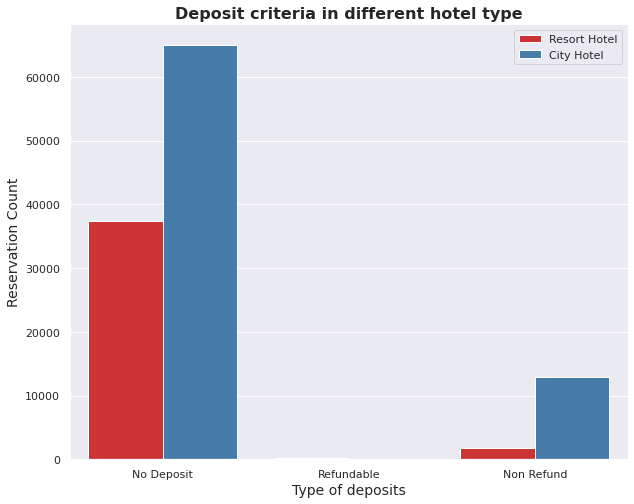

In [46]:
# This graph shows Deposit type in different hotel type.
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.countplot(hue=new_df['hotel'],x=new_df['deposit_type'])
graph.set_title('Deposit criteria in different hotel type',fontsize = 16, fontweight='bold')
graph.set_xlabel('Type of deposits',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

###Mostly deposits are not asked at time of booking in both the hotel types.

# **Analysis based on Cancellation**

## **Cancellation made in each hotel type**

In [47]:
# Using .loc() property for single condition.
# Creating a new conditional column where there is cancellation.
new_df.loc[(new_df['is_canceled']==1), 'is_canceled'] = "Cancellation"

In [48]:
cancellation = new_df.loc[new_df["is_canceled"] =='Cancellation']

Text(0.5, 1.0, '% of cancellations made in each Hotel Type')

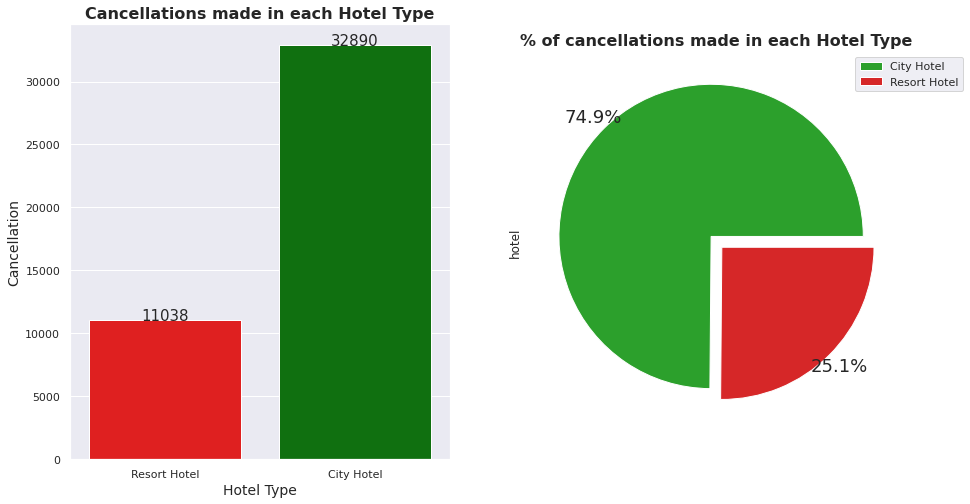

In [49]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

# This graph shows cancellations made in different hotel types.
ax = sns.countplot(ax=axes[0],x ='hotel', data=cancellation, palette=['red', 'green'])
sns.set(rc={'figure.figsize':(12,8)})
ax.set_title('Cancellations made in each Hotel Type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

ax=axes[1],cancellation['hotel'].value_counts().plot.pie(explode=[0.05]*2, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,labeldistance=1.3,labels=None,colors=['tab:green','tab:red'])
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['hotel'].value_counts().index.tolist())
plt.title('% of cancellations made in each Hotel Type',fontsize = 16, fontweight='bold')

### Cancellation is less in Resort hotels as compared to City hotels.
### Cancellation rate is 75% in City hotels as compared to 25% in Resort hotels. 


## **Cancellations made in each Year**

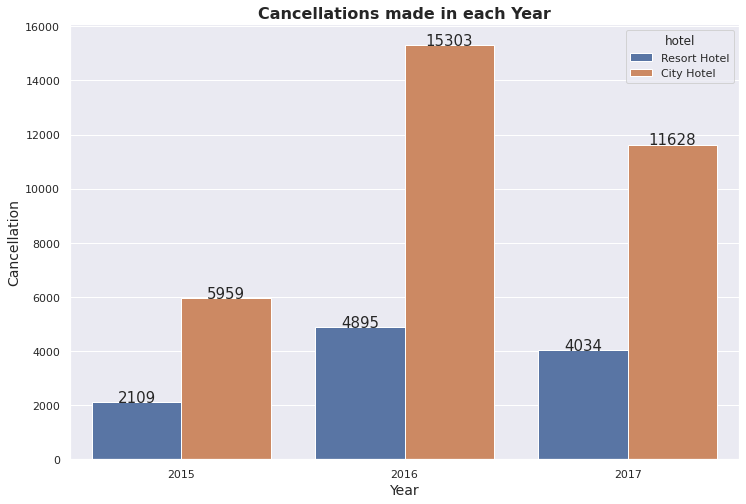

In [50]:
ax = sns.countplot(x ='arrival_date_year',hue='hotel',data=cancellation)
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("husl")
ax.set_title('Cancellations made in each Year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### We can see maximum cancellations were done in the year 2016 in both the hotel types.
### Every year there is 25-30% cancellation for resort hotels and 40-45% cancellation for city hotels.

## **Cancellations made in each months**

Text(0, 0.5, 'Cancellation')

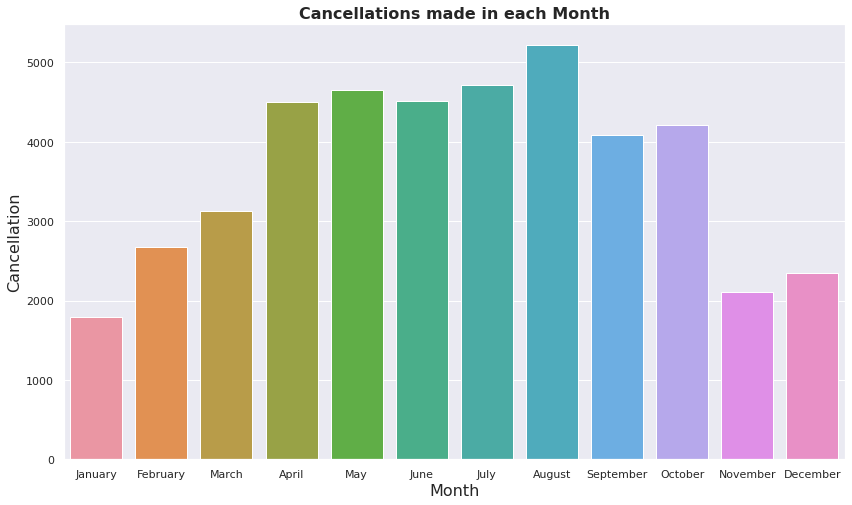

In [51]:
# This graph shows cancellations made in each month
sns.set(rc={'figure.figsize':(14,8)})
graph = sns.countplot(x ='arrival_date_month', data=cancellation)
graph.set_title('Cancellations made in each Month',fontsize = 16, fontweight='bold')
graph.set_xlabel('Month',fontsize = 16)
graph.set_ylabel('Cancellation',fontsize = 16)

### We can see a huge number of cancellations are done in the month of August.



## **Cancellations for different distribution channel.**

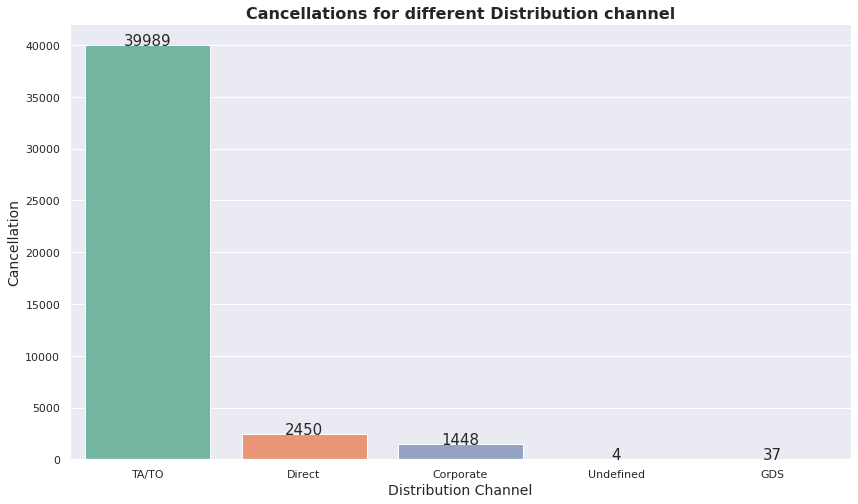

In [52]:
# The graph shows cancellations for different distribution channel
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("Set2")
ax = sns.countplot(x = 'distribution_channel', data=cancellation)
ax.set_title('Cancellations for different Distribution channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Distribution Channel',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### Here we monitored that maximum cancellations are from TA/TO followed by direct and coporate booking channel. 

## **Analysis of cancellations on deposits**

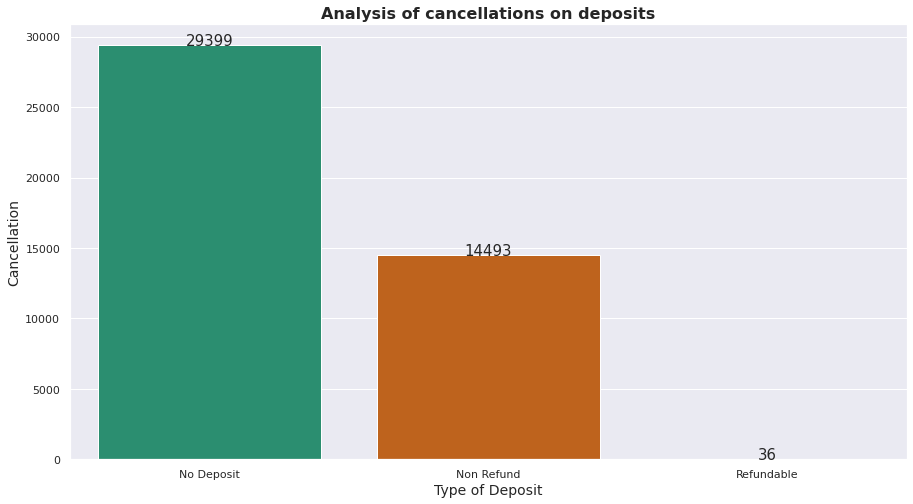

In [53]:
# This graph shows cancellations made due to deposits.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Dark2")
ax = sns.countplot(x = 'deposit_type', data=cancellation)
ax.set_title('Analysis of cancellations on deposits',fontsize = 16, fontweight='bold')
ax.set_xlabel('Type of Deposit',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### Chances of cancellation is high when there is no deposits taken by hotels. So minimum deposits should be taken by hotels to decrease the rate of cancellation.

## **Cancellation based on customer type**

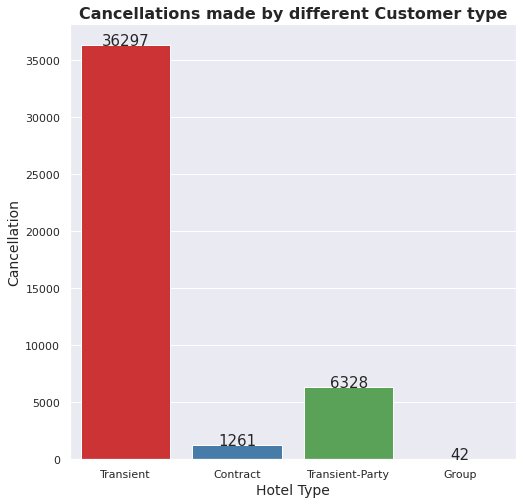

In [54]:
# This graph shows the cancellation made by differnt customer type.
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='customer_type',data=cancellation)
ax.set_title('Cancellations made by different Customer type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### Transient customers cancels more often but when people book in group it leads to lesser cancellations.

#**Analysis based on Stays**

## **Optimal stay period**

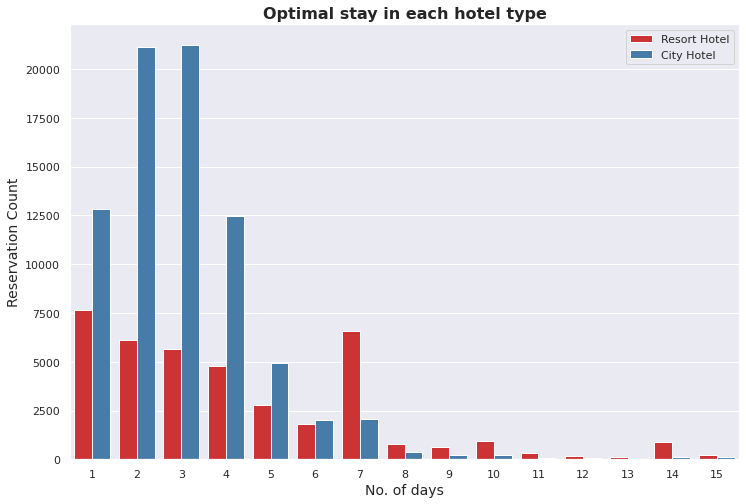

In [55]:
# This graph shows No. of total stays in each hotel type.
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x ='total_stays',hue='hotel', data=new_df)
ax.set_title('Optimal stay in each hotel type',fontsize = 16, fontweight='bold')
ax.set_xlabel('No. of days',fontsize = 14)
ax.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

### It can be stated that generally people prefer City hotels for shorter stay and Resort Hotels for longer stay. Prefered stay in city hotel is between 1 to 4 days and 1 to 7 days in resort hotel.